In [94]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support, accuracy_score  
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
import itertools
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
np.set_printoptions(threshold=np.nan)

pdata = pd.read_csv("../Data/preprocessed_alcohol_balance.csv")
pdata = pdata.drop(["Unnamed: 0"], axis=1)
pdata['Conditie'] = pdata['Conditie'].map({'norm': 0,  'bril': 1})
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(pdata)

,TestID,Conditie,SubjectID,SegmentNr,WalkingDirection,SegmentData,Height,Weight,Age,BMI,std_SegmentData,mad_SegmentData,AverageStepLength,Velocity,Alcohol_Class,Alcohol,Balance
0,006A01',0,6,1,away,[[array([[0.04697253]]) array([[-0.18321628]])...,177,70.0,20,22.343516,0.060870,0.048709,0.610128,2.333333,Sober,0.00,4.299411
1,006A01',0,6,2,towards,[[array([[0.40771624]]) array([[-0.22044282]])...,177,70.0,20,22.343516,0.038465,0.031206,0.681944,2.066667,Sober,0.00,4.299411
2,006A01',0,6,3,away,[[array([[0.09305737]]) array([[-0.19160482]])...,177,70.0,20,22.343516,0.030903,0.022252,0.713798,2.033333,Sober,0.00,4.299411
3,006A01',0,6,4,towards,[[array([[0.44424376]]) array([[-0.2283845]]) ...,177,70.0,20,22.343516,0.074751,0.060879,0.651639,2.333333,Sober,0.00,9.259287
4,009A01',0,9,1,away,[[array([[-0.08974021]]) array([[-0.0481508]])...,195,86.0,23,22.616700,0.028861,0.025316,0.768314,2.066667,Sober,0.00,9.259287
5,009A01',0,9,2,towards,[[array([[0.47497733]]) array([[-0.09702823]])...,195,86.0,23,22.616700,0.029494,0.024061,0.685495,2.300000,Sober,0.00,1.743205
6,009A01',0,9,3,away,[[array([[0.00489379]]) array([[-0.07232992]])...,195,86.0,23,22.616700,0.017266,0.015080,0.689099,2.333333,Sober,0.00,1.743205
7,009A01',0,9,4,towards,[[array([[0.51498991]]) array([[-0.09675995]])...,195,86.0,23,22.616700,0.015360,0.013693,0.660362,2.266667,Sober,0.00,1.743205
8,010A01',0,10,1,away,[[array([[-0.33516738]]) array([[-0.30029692]]...,165,65.0,28,23.875115,0.068683,0.056155,0.538055,2.666667,Sober,0.00,37.059931
9,010A01',0,10,2,towards,[[array([[0.54318447]]) array([[-0.34777679]])...,165,65.0,28,23.875115,0.024063,0.021438,0.571604,3.000000,Sober,0.00,37.059931


In [96]:
adata = pd.read_csv("../Data/preprocessed_alcohol_balance.csv")
adata['Conditie'] = adata['Conditie'].map({'norm': 0,  'bril': 1})
adata['Alcohol_Class'] = adata['Alcohol_Class'].map({'Sober': 0,  'Light': 0, 'Tipsy': 1,  'Drunk': 1})
adata = adata.drop(adata[adata.Alcohol.eq(0)].sample(424).index)
adata.groupby('Alcohol_Class').count()

# normdata = pd.read_csv("../Data/preprocessed_alcoholdata_full.csv")
# normdata['Conditie'] = normdata['Conditie'].map({'norm': 0,  'bril': 1})
# normdata = normdata.drop(normdata[normdata["Conditie"] > 0].index)
# normdata['Alcohol'] = normdata['Alcohol'].map({'Sober': 0,  'Light': 1, 'Tipsy': 1,  'Drunk': 1})
# normdata = normdata.drop(normdata[normdata.Alcohol.eq(0)].sample(104).index)
# normdata.groupby('Alcohol').count()

,Unnamed: 0,TestID,Conditie,SubjectID,SegmentNr,WalkingDirection,SegmentData,Height,Weight,Age,BMI,std_SegmentData,mad_SegmentData,AverageStepLength,Velocity,Alcohol,Balance
Alcohol_Class,,,,,,,,,,,,,,,,,
0,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148
1,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148


In [101]:
#Splits data into training and validation according to specified ratio
def validation_split(data, ratio):
    sidlist = data['SubjectID'].unique()
    gdata = [data[data['SubjectID']==sid] for sid in sidlist]
    np.random.shuffle(gdata)
    N = len(gdata)
    training = gdata[:int(ratio*N)]
    validation = gdata[(int(ratio*N)):]
    return training,validation

# Converts the arrays in a list to one flattend dataframe
def flatten(data, variable_list):
    return pd.DataFrame(np.vstack(data), columns=variable_list)

def get_split_data(originaldata, variable_list, ratio):
    data = originaldata[variable_list]
    training,validation = validation_split(data, 0.7)
    training = flatten(training, variable_list)
    validation = flatten(validation, variable_list)

    X_train = training.drop(['Conditie', 'SubjectID'], axis=1)
    y_train = training['Conditie']
    X_train = X_train.astype(float)
    y_train = y_train.astype(int)
    
    X_test = validation.drop(['Conditie', 'SubjectID'], axis=1)
    y_test = validation['Conditie']
    X_test = X_test.astype(float)
    y_test = y_test.astype(int)
    return X_train, X_test, y_train, y_test

collist =  ['SubjectID', 'Conditie', 'Balance', 'mad_SegmentData']
X_train, X_test, y_train, y_test = get_split_data(pdata, collist , 0.7)


X_train = np.array(X_train, dtype=float)
y_train = np.array(y_train, dtype=int)

X_test = np.array(X_test, dtype=float)
y_test = np.array(y_test, dtype=int)


In [102]:
variable_list = ['SubjectID', 'Alcohol', 'Balance', 'mad_SegmentData']

data = adata[variable_list]
training,validation = validation_split(data, 0.7)
training = flatten(training, variable_list)
validation = flatten(validation, variable_list)

X_train = training.drop(['Alcohol', 'SubjectID'], axis=1)
y_train = training['Alcohol']
X_train = X_train.astype(float)
y_train = y_train.astype(int)

X_test = validation.drop(['Alcohol', 'SubjectID'], axis=1)
y_test = validation['Alcohol']
X_test = X_test.astype(float)
y_test = y_test.astype(int)

X_train = np.array(X_train, dtype=float)
y_train = np.array(y_train, dtype=int)

X_test = np.array(X_test, dtype=float)
y_test = np.array(y_test, dtype=int)


logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial', random_state=100000, max_iter=1000)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')


Accuracy of our model is equal 81.11 %.


In [103]:
variable_list = ['SubjectID', 'Alcohol','Balance', 'mad_SegmentData']

def make_alcohol_decisions(originaldata, variable_list):
    data = originaldata[variable_list]
    training,validation = validation_split(data, 0.7)
    training = flatten(training, variable_list)
    validation = flatten(validation, variable_list)

    X_train = training.drop(['Alcohol', 'SubjectID'], axis=1)
    y_train = training['Alcohol']
    X_train = X_train.astype(float)
    y_train = y_train.astype(int)
    
    X_test = validation.drop(['Alcohol', 'SubjectID'], axis=1)
    y_test = validation['Alcohol']
    X_test = X_test.astype(float)
    y_test = y_test.astype(int)
    
    scaler = StandardScaler()

    # Fit on training set only.
    scaler.fit(X_train)

    # Apply transform to both the training set and the test set.
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    lda = LDA(n_components=1)  
    X_train = lda.fit_transform(X_train, y_train)  
    X_test = lda.transform(X_test) 
    
    logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial', random_state=100000, max_iter=1000)
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    return accuracy_score(y_test, y_pred)


make_alcohol_decisions(adata, variable_list)

0.7391304347826086

In [60]:
print('Accuracy Scores for different variables (mean of 100 loops)')
print('BMI, Age, mad_SegmentData:', np.mean([make_alcohol_decisions(adata, ['SubjectID', 'Alcohol', 'BMI', 'Age', 'mad_SegmentData']) for i in range(100)]))
print('BMI, Age, AverageStepLength:', np.mean([make_alcohol_decisions(adata, ['SubjectID', 'Alcohol', 'BMI', 'Age', 'AverageStepLength']) for i in range(100)]))
print('Height, BMI, mad_SegmentData, AverageStepLength:', np.mean([make_alcohol_decisions(adata, ['SubjectID', 'Alcohol', 'Height', 'BMI', 'AverageStepLength', 'mad_SegmentData']) for i in range(100)]))
# print('BMI, mad_SegmentData, AverageStepLength:', np.mean([make_alcohol_decisions(adata, ['SubjectID', 'Alcohol', 'BMI', 'AverageStepLength', 'mad_SegmentData']) for i in range(100)]))
# print('Age, mad_SegmentData, AverageStepLength:', np.mean([make_alcohol_decisions(adata, ['SubjectID', 'Alcohol', 'Age', 'AverageStepLength', 'mad_SegmentData']) for i in range(100)]))
# print('mad_SegmentData, AverageStepLength:', np.mean([make_alcohol_decisions(adata, ['SubjectID', 'Alcohol', 'AverageStepLength', 'mad_SegmentData']) for i in range(100)]))
# print('mad_SegmentData, AverageStepLength:', np.mean([make_alcohol_decisions(normdata, ['SubjectID', 'Alcohol', 'AverageStepLength', 'mad_SegmentData']) for i in range(100)]))



Accuracy Scores for different variables (mean of 100 loops)
BMI, Age, mad_SegmentData: 0.4717293069629289
BMI, Age, AverageStepLength: 0.4752812429207925
Height, BMI, mad_SegmentData, AverageStepLength: 0.4845070142158752


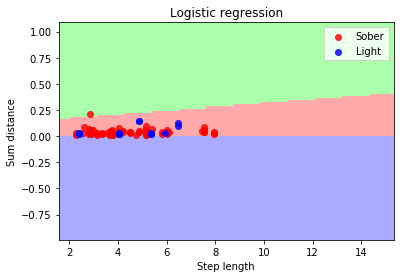

In [105]:
from sklearn import neighbors, datasets
from matplotlib.colors import ListedColormap
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

h = .02  # step size in the mesh
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
colors = {0: 'red', 1: 'blue', 2: 'violet', 3: 'indigo'}
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
# plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold)

score = logreg.score(X_test, y_test)
# plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, alpha=0.5, cmap=cmap_bold)

for label in np.unique(y_test):
    indices = np.where(y_test == label)
    plt.scatter(X_test[indices, 0], X_test[indices, 1], c=colors[label], alpha=0.8, 
                label=' {}'.format(label))

colors = ['red', 'blue', 'violet', 'indigo']

labels = ['Sober', 'Light', 'Tipsy', 'Drunk']
plt.legend(labels)
plt.title('Logistic regression')
plt.xlabel('Step length')
plt.ylabel('Sum distance')
plt.savefig('Logistic regression alcohol')
plt.show()